In [28]:
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import psycopg2

In [29]:
list = []

In [30]:
conn = psycopg2.connect(database = "postgres", 
                        user = "postgres", 
                        host= 'localhost',
                        password = "1234",
                        port = 5432)

In [31]:
cur = conn.cursor()

In [32]:
query='SELECT * FROM dataset'
cur.execute(query)
rows = cur.fetchall()
conn.commit()
conn.close()
for row in rows:
    list.append(row)

In [33]:
# Carrega os dados como dataframe do Pandas
df = pd.DataFrame(list, columns = ['ID_Pedido','Data_Pedido','ID_Cliente','Segmento','Pais','Cidade','Estado','ID_Produto','Categoria','SubCategoria','Valor_Venda'])

In [34]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [35]:
#Pergunta de Negócio 1:
#Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [36]:
df_p1 = df[df['Categoria'] == 'Office Supplies']

In [37]:
df_p1_total = df_p1.groupby('Cidade')['Valor_Venda'].sum()
df_p1_total.head(20)

Cidade
Aberdeen               25.500
Abilene                 1.392
Akron                1107.646
Albuquerque           943.122
Alexandria           4879.790
Allen                  24.720
Allentown             819.876
Altoona                20.451
Amarillo               73.920
Anaheim              2527.548
Andover                80.950
Ann Arbor             240.163
Antioch                19.440
Apopka                774.666
Apple Valley          251.760
Appleton               21.560
Arlington            3773.852
Arlington Heights      14.112
Arvada                  6.264
Asheville             111.416
Name: Valor_Venda, dtype: float64

In [38]:
cidade_maior_venda = df_p1_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda)

Cidade com maior valor de venda para 'Office Supplies': New York City


In [39]:
#Ordena o DataFrame com base na coluna em ordem decrescente (ou seja, do maior para o menor).
#Seleciona as 3 primeiras linhas após a ordenação, o que nos dá os registros com os 3 maiores salários.
df_p1_total.sort_values(ascending=False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

In [40]:
#Pergunta de Negócio 2:
#Qual o Total de Vendas Por Data do Pedido?
#Demonstre o resultado através de um gráfico de barras.

In [41]:
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()
df_p2.sort_values(ascending=False)

Data_Pedido
2015-03-18    28106.716
2017-10-02    18452.972
2018-10-22    15158.877
2018-03-23    14816.068
2015-09-08    14228.428
                ...    
2015-10-01        4.710
2015-06-24        4.272
2015-01-28        3.928
2018-07-12        3.816
2016-07-19        2.025
Name: Valor_Venda, Length: 1226, dtype: float64

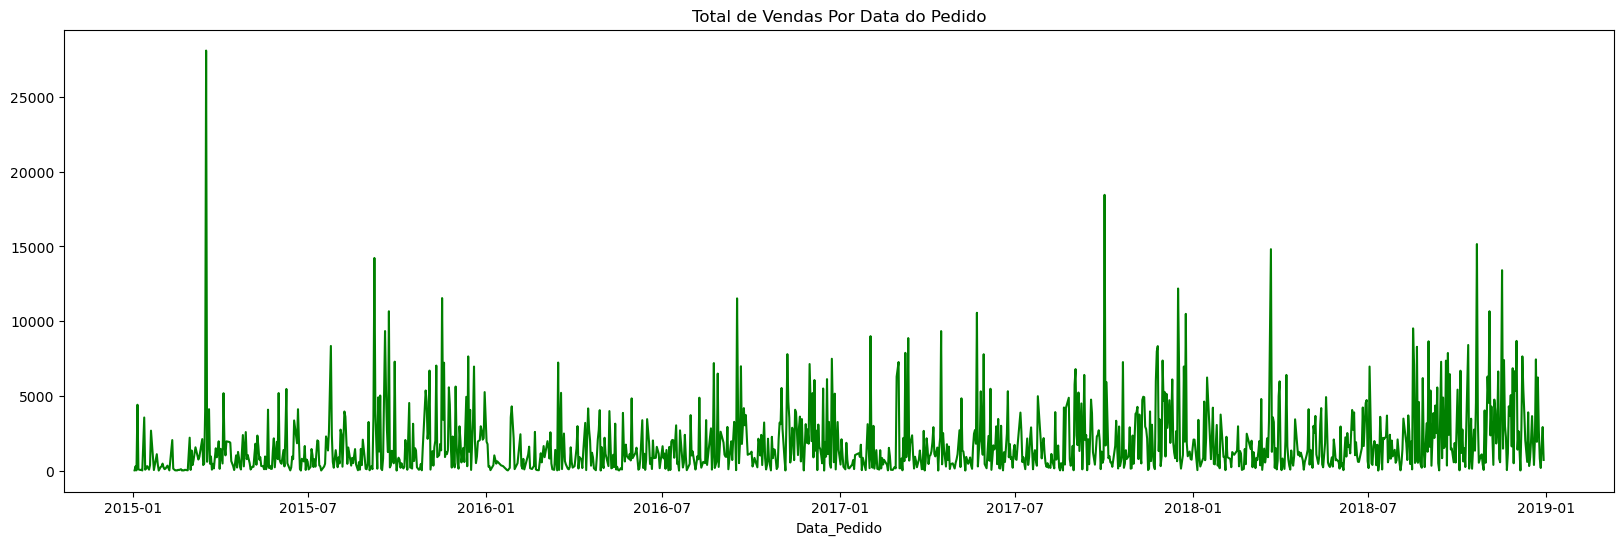

In [42]:
plt.figure(figsize = (20, 6))
df_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

In [43]:
#Pergunta de Negócio 3:
#Qual o Total de Vendas por Estado?
#Demonstre o resultado através de um gráfico de barras.

In [44]:
#
df_p3=df.groupby('Estado')['Valor_Venda'].sum().reset_index()
df_p3.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


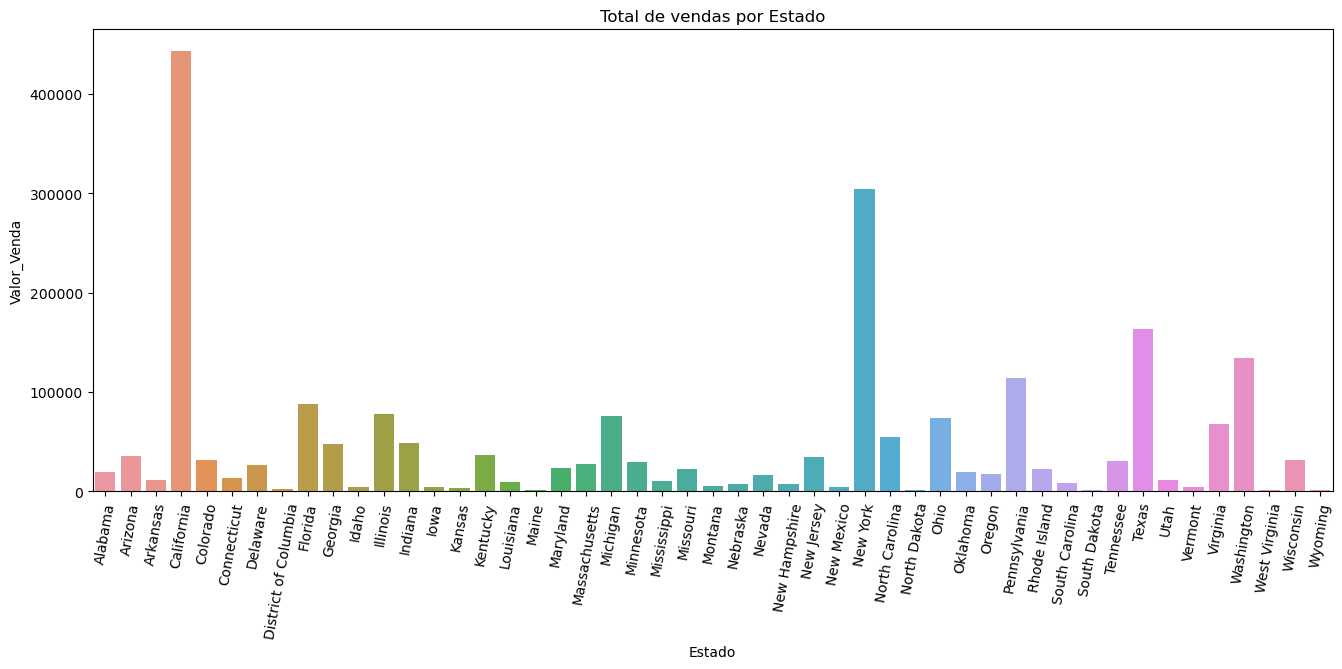

In [45]:
plt.figure(figsize = (16,6))
sns.barplot(data = df_p3, y='Valor_Venda', x='Estado').set(title = 'Total de vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

In [46]:
#Pergunta de Negócio 4:
#Quais São as 10 Cidades com Maior Total de Vendas?
#Demonstre o resultado através de um gráfico de barras.

In [47]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
df_p4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',ascending = False).head(10)

In [48]:
df_p4.head()

,Cidade,Valor_Venda
327,New York City,251749.219
265,Los Angeles,171654.633
450,Seattle,114725.478
436,San Francisco,107489.952
372,Philadelphia,107197.803


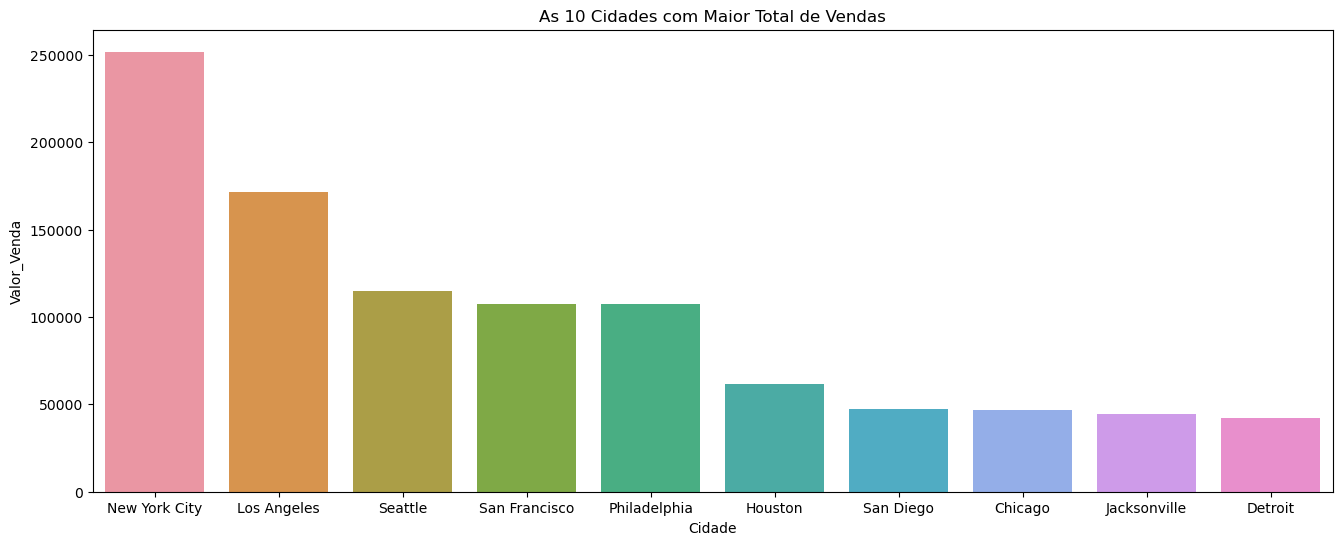

In [49]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_p4, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

In [50]:
#Pergunta de Negócio 5:
#Qual Segmento Teve o Maior Total de Vendas?
#Demonstre o resultado através de um gráfico de pizza.

In [51]:
# Agrupamos por segmento e calculamos o total de vendas, reset_index: Mantem o cabeçalho do campo, sort_values: ordena o campo.
df_p5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)
df_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [52]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) #SOMA TODOS OS VALORES PARA UM VALOR TOT 
        val = int(round(pct * total / 10.0)) #FUNÇÃO ROUND ARREDONDA OS VALORES
        return ' $ {v:d}'.format(v = val) #FORMATA APENAS PARA SAIR COM O $ NA FRENTE
    return my_format

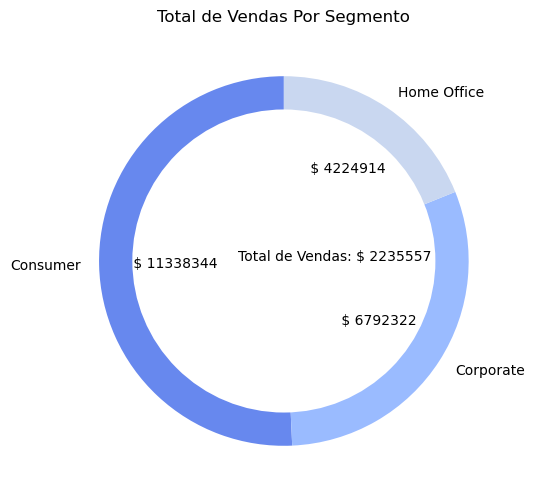

In [53]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_p5['Valor_Venda'], 
        labels = df_p5['Segmento'],
        autopct = autopct_format(df_p5['Valor_Venda']),
        startangle = 90) #ANGULO
# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_p5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

In [54]:
#Pergunta de Negócio 6 (Desafio Nível Baby):
#Qual o Total de Vendas Por Segmento e Por Ano?

In [55]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

In [56]:
# Extraímos o ano criando nova coluna
df['Ano'] = df['Data_Pedido'].dt.year
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [57]:
# Total de vendas por segmento e por ano
df_p6 = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
df_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

In [58]:
#Pergunta de Negócio 7 (Desafio Nível Júnior):
#Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

#Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
#Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
#Quantas Vendas Receberiam 15% de Desconto?

In [59]:
# Cria uma nova DF de acordo com a regra definida acima
df_15 = df[df['Valor_Venda'] > 1000]
df_10 = df[df['Valor_Venda'] < 1000]

In [60]:
print('Quantidade de registros com 15%: ',df_15['Valor_Venda'].count())
print('Quantidade de registros com 10%: ',df_10['Valor_Venda'].count())

Quantidade de registros com 15%:  457
Quantidade de registros com 10%:  9243


In [61]:
#Pergunta de Negócio 8 (Desafio Nível Master):
#Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [62]:
# Criamos uma coluna calculando o valor de venda menos o desconto
df_15['Valor_Venda_Desconto'] = df_15['Valor_Venda'] - (df_15['Valor_Venda'] * 0.15)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9724\3896102472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_15['Valor_Venda_Desconto'] = df_15['Valor_Venda'] - (df_15['Valor_Venda'] * 0.15)


In [63]:
print('Média antes do desconto: ', df_15['Valor_Venda'].mean().round(2))
print('Média depois do desconto: ', df_15['Valor_Venda_Desconto'].mean().round(2))

Média antes do desconto:  2116.81
Média depois do desconto:  1799.29


In [64]:
#Pergunta de Negócio 9 (Desafio Nível Master Ninja):
#Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
#Demonstre o resultado através de gráfico de linha.

In [65]:
df['Ano'] = df['Data_Pedido'].dt.year
df['Mes'] = df['Data_Pedido'].dt.month
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10


In [66]:
df_p9 = df.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].mean().round(2).reset_index()
df_p9

,Segmento,Ano,Mes,Valor_Venda
0,Consumer,2015,1,146.74
1,Consumer,2015,2,117.33
2,Consumer,2015,3,152.17
3,Consumer,2015,4,189.76
4,Consumer,2015,5,191.34
...,...,...,...,...
139,Home Office,2018,8,176.16
140,Home Office,2018,9,249.14
141,Home Office,2018,10,412.58
142,Home Office,2018,11,247.52


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

<Figure size 1200x600 with 0 Axes>

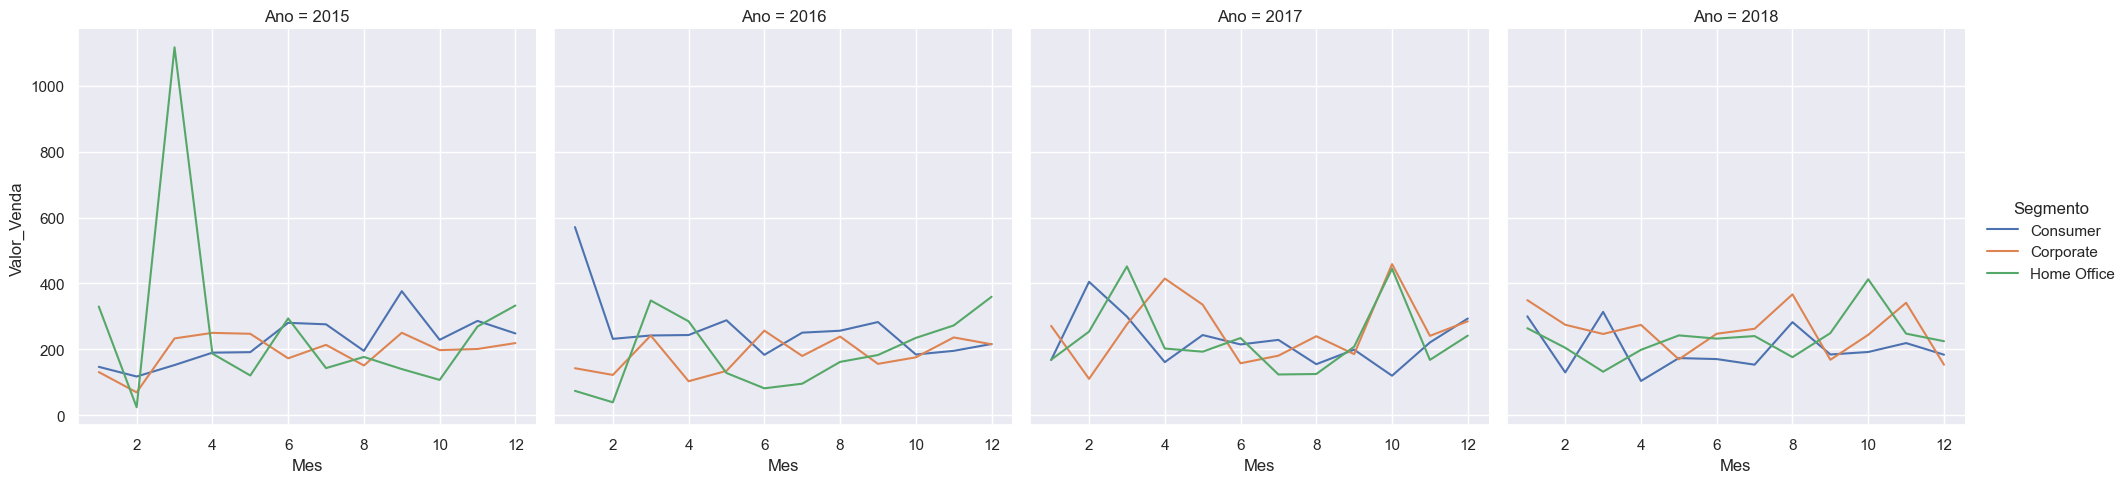

In [67]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_p9, 
                   y = 'Valor_Venda', 
                   x = 'Mes',
                   hue = 'Segmento', 
                   col = 'Ano',
                   col_wrap = 4)
plt.show()

In [ ]:
#Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):
#Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?
#Demonstre tudo através de um único gráfico.

In [88]:
#groupby usando mais de uma condição
df_p10 = df.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().round(2).reset_index().sort_values(by = 'Valor_Venda',ascending = False).head(12)

In [96]:
#Retorna os valores únicos
categoria = df['Categoria'].unique().tolist()
categoria

['Furniture', 'Office Supplies', 'Technology']

In [144]:
#Filtrando DF
df_p10_furniture = df_p10[df_p10['Categoria'] == 'Furniture']
df_p10_office = df_p10[df_p10['Categoria'] == 'Office Supplies']
df_p10_technology = df_p10[df_p10['Categoria'] == 'Technology']
df_p10_furniture.head()

,Categoria,SubCategoria,Valor_Venda
1,Furniture,Chairs,317919.62
3,Furniture,Tables,202083.36
0,Furniture,Bookcases,108045.05
2,Furniture,Furnishings,88862.77


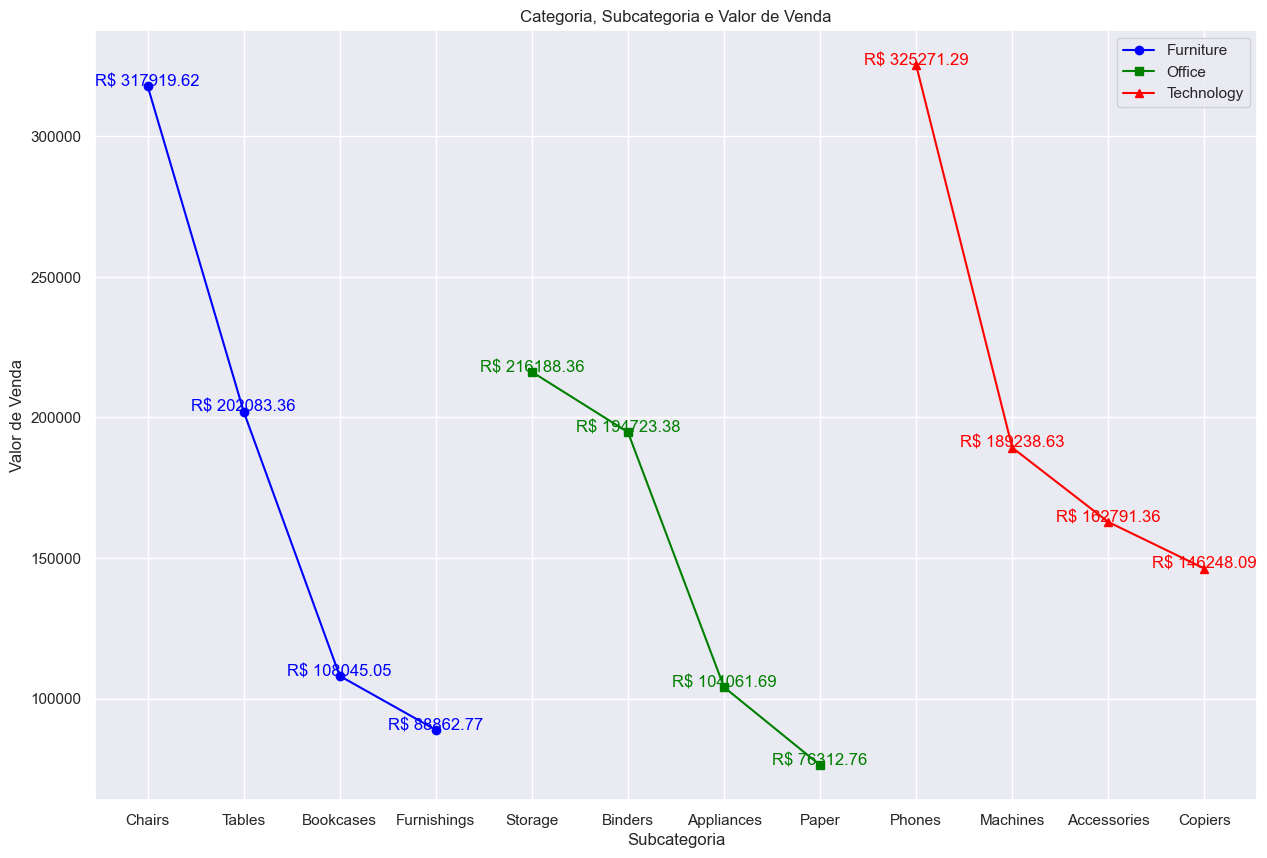

In [145]:
# Criando o gráfico com cores personalizadas
plt.figure(figsize=(15, 10))

# Gráficos para cada categoria
plt.plot(df_p10_furniture['SubCategoria'], df_p10_furniture['Valor_Venda'], 
         label='Furniture', color='blue', marker='o')
plt.plot(df_p10_office['SubCategoria'], df_p10_office['Valor_Venda'], 
         label='Office', color='green', marker='s')
plt.plot(df_p10_technology['SubCategoria'], df_p10_technology['Valor_Venda'], 
         label='Technology', color='red', marker='^')

# Adicionando rótulos nas interseções
for i in range(len(df_p10_furniture)):
    plt.text(df_p10_furniture['SubCategoria'].iloc[i], df_p10_furniture['Valor_Venda'].iloc[i] + 10, 
             f'R$ {df_p10_furniture["Valor_Venda"].iloc[i]:.2f}', ha='center', color='blue')

for y in range(len(df_p10_office)):
    plt.text(df_p10_office['SubCategoria'].iloc[y], df_p10_office['Valor_Venda'].iloc[y] + 10, 
             f'R$ {df_p10_office["Valor_Venda"].iloc[y]:.2f}', ha='center', color='green')

for z in range(len(df_p10_technology)):
    plt.text(df_p10_technology['SubCategoria'].iloc[z], df_p10_technology['Valor_Venda'].iloc[z] + 10, 
             f'R$ {df_p10_technology["Valor_Venda"].iloc[z]:.2f}', ha='center', color='red')


# Adicionando título, rótulos e legenda
plt.title('Categoria, Subcategoria e Valor de Venda')
plt.xlabel('Subcategoria')
plt.ylabel('Valor de Venda')  # Rótulo do eixo Y
plt.legend()  # Mostrando a legenda

# Exibindo o gráfico
plt.show()  # Mostrando o gráfico